# Описание проекта

Подготовим прототип модели машинного обучения для компании, разрабатывающей решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В нашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

**Наименование признаков:**<br/>
[этап].[тип_параметра].[название_параметра]<br/>
Возможные значения для блока [этап]:<br/>
*rougher* — флотация<br/>
*primary_cleaner* — первичная очистка<br/>
*secondary_cleaner* — вторичная очистка<br/>
*final* — финальные характеристики<br/>
Возможные значения для блока [тип_параметра]:<br/>
*input* — параметры сырья<br/>
*output* — параметры продукта<br/>
*state* — параметры, характеризующие текущее состояние этапа<br/>
*calculation* — расчётные характеристики

# 1. Подготовка данных

1.1. Откроем файлы и изучите их.
Путь к файлам:<br/>
/datasets/gold_recovery_train.csv.<br/>
/datasets/gold_recovery_test.csv.<br/>
/datasets/gold_recovery_full.csv.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, make_scorer

pd.set_option('display.max_columns', None)
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 

In [12]:
train = pd.read_csv('/datasets/gold_recovery_train.csv')
test = pd.read_csv('/datasets/gold_recovery_test.csv')
full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [13]:
display(train.head(3))
display(test.head(3))
display(full.head(3))

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

1.2. Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдём MAE между расчётами и значением признака. Опишим выводы.

In [14]:
#Проверим rougher.output.recovery (эффективность обогащения чернового концентрата)
target_check = train['rougher.output.recovery']

#В условном целевом признаке есть значения nan(их 10%) для проверки МАЕ можно их дропнуть
target_check = target_check.dropna()

#Вычленяем переменные, участвующие в формуле
input_part = train['rougher.input.feed_au']
output_good_part = train['rougher.output.concentrate_au']
output_bad_part = train['rougher.output.tail_au']

#Расчитываем по формуле
recovery = ((output_good_part*(input_part-output_bad_part))/(input_part*(output_good_part-output_bad_part)))*100

#Убираем данные которые по индексу соответствуют индексу переменной "target_check" с дропнутыми nan
recovery = pd.Series(recovery, index = target_check.index )
display(recovery)

#Проверка МАЕ
print(mean_absolute_error(target_check,recovery))

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Length: 14287, dtype: float64

9.444891926100695e-15


> Вывод: МАЕ 0,000000000000009.4 достаточно мала, можем сказать что эффективность посчитана верно

1.3. Проанализируем признаки, недоступные в тестовой выборке. Узнаем, что это за параметры и к какому типу относятся?

In [15]:
unique_feature = list(set(train)- set(test))
unique_feature = pd.Series(unique_feature)
print(unique_feature)

0                               rougher.output.recovery
1                       primary_cleaner.output.tail_sol
2                      secondary_cleaner.output.tail_pb
3                               rougher.output.tail_sol
4                        primary_cleaner.output.tail_pb
5                                rougher.output.tail_ag
6                 primary_cleaner.output.concentrate_au
7                        primary_cleaner.output.tail_au
8                                  final.output.tail_pb
9                         rougher.output.concentrate_au
10                                final.output.tail_sol
11                               rougher.output.tail_pb
12                       rougher.output.concentrate_sol
13        rougher.calculation.sulfate_to_au_concentrate
14                                 final.output.tail_ag
15                               rougher.output.tail_au
16                    secondary_cleaner.output.tail_sol
17                primary_cleaner.output.concent

> В обучающей присутствуют (а вот в тестовой-нет) 34 признака <br/>
4 из которых это расчётные характеристики химических компонентов <br/>
30 признаков -относятся к типу параметров выходного продукта (так как расчитываются значительно позже<br/> 
Также в тестовом наборе нет целевых признаков:

>*Эффективность обогащения<br/>
 - final.output.recovery
 - rougher.output.recovery<br/>

>*Концентрация итогового продукта на разных этапах (для примера,золото:)<br/>
 - rougher.output.concentrate_au
 - primary_cleaner.output.concentrate_au
 - final.output.concentrate_au

>*Концентрация итогового продукта в отвале на разных этапах (для примера,золото:)<br/>
 - rougher.output.tail_au
 - primary_cleaner.output.tail_au
 - secondary_cleaner.output.tail_au
 - final.output.tail_au

1.4. Проведем предобработку данных.

In [16]:
#Поскольку мы знаем что данные заполняются в таблицу последовательно через промежутки времени, применим метод ffill для
#заполнения пропусков предыдущими значениями
train.ffill(inplace=True)
train.ffill(inplace=True)
test.ffill(inplace=True)

# 2. Анализ данных

2.1. Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишем выводы.

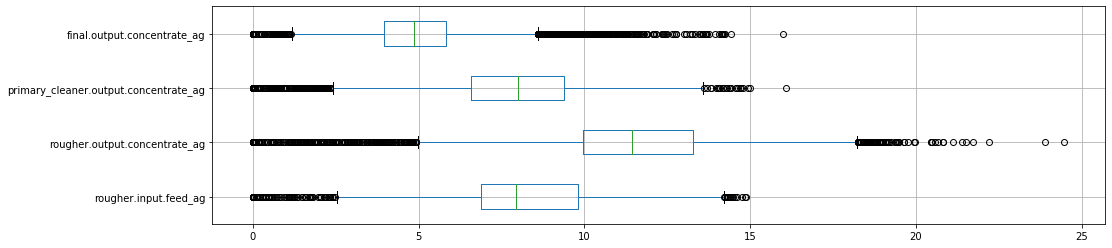

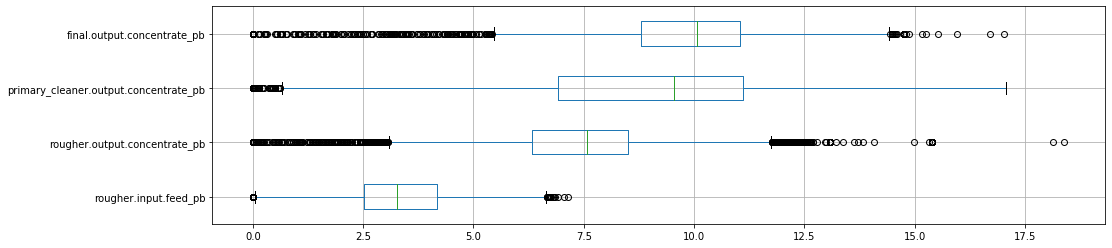

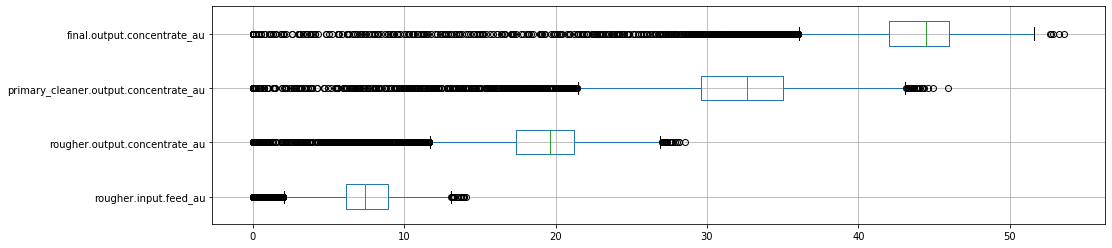

In [17]:
def boxplot_conсentration(data):
    col_ag = ['rougher.input.feed_ag','rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']
    col_pb = ['rougher.input.feed_pb','rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']
    col_au = ['rougher.input.feed_au','rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au']
    col = (col_ag, col_pb, col_au)
    for i in col:
        data.boxplot(vert = False,figsize =(16,4),column =i)
        plt.show()
boxplot_conсentration(train)

> Вывод: концентрация золота в общей массе сырья с каждым этапом увеличивалось, причем равнозначными  ступеня, финальная средняя концентрация 45 единиц <br>
концентрация свинца на первых этапах очистки росла, но на этапе2 и финальном этапе практицески не изменилась <br>
концентрация серебра после флотации с каждым этапом падала

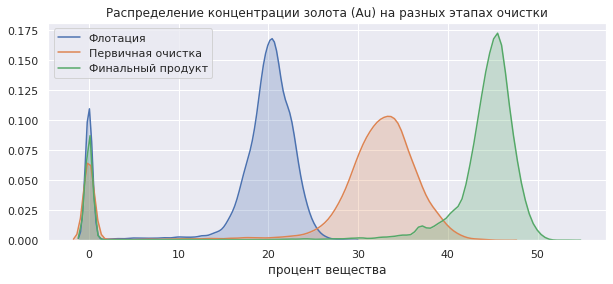

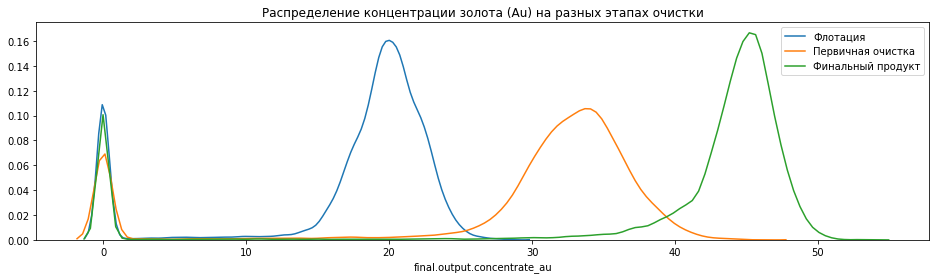

In [18]:
fig,axes = plt.subplots(1,1,figsize = (16,4))
axes.set_title('Распределение концентрации золота (Au) на разных этапах очистки')


rougher_output = train['rougher.output.concentrate_au']
primary_cleaner = train['primary_cleaner.output.concentrate_au']
final_output = train['final.output.concentrate_au']
sns_displot = sns.distplot(rougher_output, label = 'Флотация',hist = False)
sns_displot = sns.distplot(primary_cleaner, label = 'Первичная очистка',hist = False)
sns_displot = sns.distplot(final_output, label = 'Финальный продукт',hist = False)
plt.legend()
fig = sns_displot.get_figure()

2.2. Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

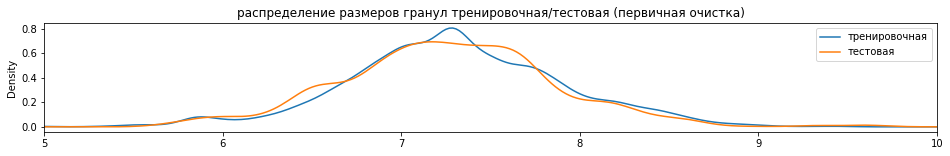

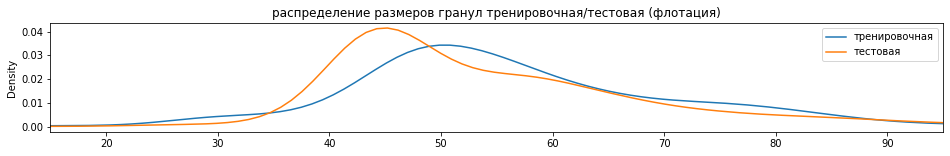

In [19]:
#Оценим визуально
train_c = train['primary_cleaner.input.feed_size']
test_c = test['primary_cleaner.input.feed_size']

train_r = train['rougher.input.feed_size']
test_r = test['rougher.input.feed_size']

ax = train_c.plot(kind='kde',figsize=(16,2),xlim=(5,10), title = 'распределение размеров гранул тренировочная/тестовая (первичная очистка)',label='тренировочная')
test_c.plot(kind='kde',ax=ax,label='тестовая')
plt.legend()
plt.show()

ax = train_r.plot(kind='kde',figsize=(16,2),xlim=(15,95), title = 'распределение размеров гранул тренировочная/тестовая (флотация)',label='тренировочная')
test_r.plot(kind='kde',ax=ax,label='тестовая')
plt.legend()
plt.show() 

>Распределения в тестовой и обучающей выборках отличаются не сильно

2.3. Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Если есть аномальные значения удалим их

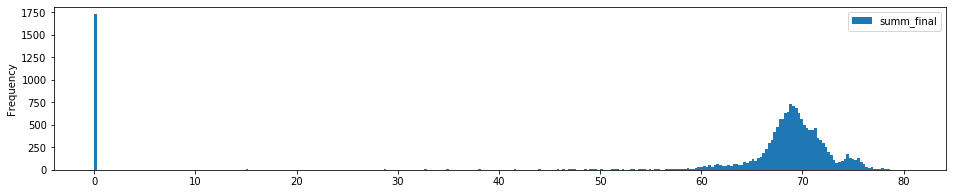

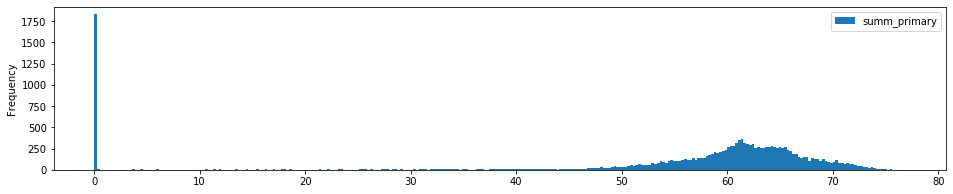

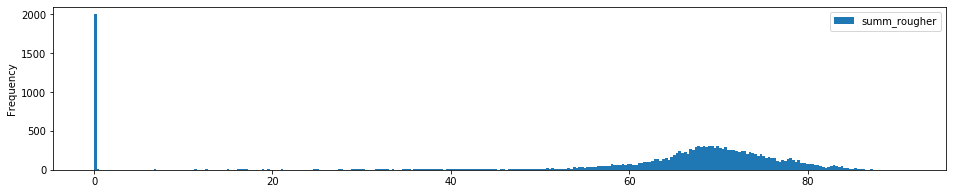

In [20]:
#добавим колонки с суммарными концентрациями
def summ_conсentration(data):
    a = 'summ_final'
    b = 'summ_primary'
    c = 'summ_rougher'
    summ = (a,b,c)
    title = ('суммарная концентрация всех элементов в сырье',\
   'суммарная концентрация всех элементов в черновом концентрате','суммарная концентрация всех элементов в финальном концентрате')
    data[a]= data['final.output.concentrate_ag'] + data['final.output.concentrate_pb']\
                  + data['final.output.concentrate_sol'] + data['final.output.concentrate_au']
    data[b]= data['primary_cleaner.output.concentrate_ag'] + data['primary_cleaner.output.concentrate_pb']\
                  + data['primary_cleaner.output.concentrate_sol'] + data['primary_cleaner.output.concentrate_au']
    data[c]= data['rougher.output.concentrate_ag'] + data['rougher.output.concentrate_pb']\
                  + data['rougher.output.concentrate_sol'] + data['rougher.output.concentrate_au']
    for i in summ:
        data.plot(kind = 'hist',bins = 300,y=i,figsize=(16,3))
        plt.show()
summ_conсentration(train)

Аномалии (всплеск на 0) наблюдаются на каждом этапе очистки, связано с тем что ранее мы заменяли пропуски методом ffill копирующем для строки с пропуском, значения следующей строки..а если следующая строка содержит 0 ?? Для правильного обучения и предсказаний модели требуется удалить нулевые значения

In [21]:
#Преобразуем нулевые значения в nan для последующей работы с ним
train = train.replace(0,np.nan)

#Удалим строки, где значения пропущены
train.dropna(inplace=True)

# 3. Модель

3.1. Напишем функцию для вычисления итоговой sMAPE.

In [22]:
#Функция на вход будет получать следующие значения (по порядку:)
# модель для предсказания чернового концентрата
# модель для предсказания финального концентрата
# массив с признаками (тестовая выборка)
# массив с признаками (обучающая выборка)
# целевой признак (черновой концентрат, обучающая выборка)
# целевой признак (финальный концентрат, обучающая выборка)
# целевой признак (черновой концентрат, тестовая выборка)
# целевой признак (финальный концентрат, тестовая выборка)

def final_smape(model_rougher,model_final,features_test,features_train,target_train_rougher,target_train_final,target_test_rougher, target_test_final):
    scaler.fit(features_test)
    features_test = scaler.transform(features_test)
    
    features_test_rougher = features_test[target_test_rougher.index]
    features_test_final = features_test[target_test_final.index]
    
    model_rougher.fit(features_train, target_train_rougher)
    predicted_model_rougher = model_rougher.predict(features_test_rougher)
    smape_rougher = ((mean_absolute_error(target_test_rougher,predicted_model_rougher))/(target_test_rougher.sum()+predicted_model_rougher.sum()))*100
        
    model_final.fit(features_train, target_train_final)
    predicted_model_final = model_final.predict(features_test_final)
    smape_final = ((mean_absolute_error(target_test_final,predicted_model_final))/(target_test_final.sum()+predicted_model_final.sum()))*100
    
    smape = 0.25*smape_rougher + 0.75*smape_final
    return print('итоговый sMAPE', smape_rougher, smape_rougher2)

In [23]:
def smape(target_1, predictions):    
    a = abs(target_1 - predictions)
    b = (abs(target_1) + abs(predictions)) / 2
    errors = a / b
    return errors.sum()/ errors.shape[0] * 100

3.2. Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке. Опишем выводы.

In [24]:
my_scorer = make_scorer(smape, greater_is_better=False)

In [25]:
#Для начала подготовим данные для модели по предсказанию концентрации в отвалах
target = train['rougher.output.recovery']

#колонки с обучающими признаками = колонки датафрейма test, потомучто с ними модели в будущем и работать
features = train[['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant','primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate', 'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_a_level', 'primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.state.floatbank8_b_level', 'primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_c_level', 'primary_cleaner.state.floatbank8_d_air', 'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate', 'rougher.input.feed_size', 'rougher.input.feed_sol', 'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate', 'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level', 'secondary_cleaner.state.floatbank2_a_air', 'secondary_cleaner.state.floatbank2_a_level', 'secondary_cleaner.state.floatbank2_b_air', 'secondary_cleaner.state.floatbank2_b_level', 'secondary_cleaner.state.floatbank3_a_air', 'secondary_cleaner.state.floatbank3_a_level', 'secondary_cleaner.state.floatbank3_b_air', 'secondary_cleaner.state.floatbank3_b_level', 'secondary_cleaner.state.floatbank4_a_air', 'secondary_cleaner.state.floatbank4_a_level', 'secondary_cleaner.state.floatbank4_b_air', 'secondary_cleaner.state.floatbank4_b_level', 'secondary_cleaner.state.floatbank5_a_air', 'secondary_cleaner.state.floatbank5_a_level', 'secondary_cleaner.state.floatbank5_b_air', 'secondary_cleaner.state.floatbank5_b_level', 'secondary_cleaner.state.floatbank6_a_air', 'secondary_cleaner.state.floatbank6_a_level']]

#отбалансируем веса признаков
scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features)

#проведем процедуру кросс-валидации, для модели регрессии
model_reg = LinearRegression()
result_reg = cross_val_score(model_reg,features,target,cv=3, scoring=my_scorer)
print('регрессия для чернового концентрата:',result_reg.mean())

#проведем процедуру кросс-валидации, для модели дерева 
#(по результатам испытаний в цикле - лучшее значение глубины - 5)
model_tree = DecisionTreeRegressor(random_state=12345, max_depth = 5)
result_tree = cross_val_score(model_tree,features,target,cv=3, scoring=my_scorer)
print('дерево для чернового концентрата:',result_tree.mean())

#проведем процедуру кросс-валидации, для модели леса деревьев
#(по результатам испытаний в цикле - лучшее значение глубины - 13, количество деревьев - тоже 13)
model_forest = RandomForestRegressor(random_state=12345, n_estimators = 13, max_depth = 13)
result_forest = cross_val_score(model_forest,features,target,cv=3, scoring=my_scorer)
print('лес деревьев для чернового концентрата:',result_forest.mean())

регрессия для чернового концентрата: -10.057755700511953
дерево для чернового концентрата: -7.578561743953571
лес деревьев для чернового концентрата: -7.735468974128451


In [26]:
features.shape

(13224, 52)

In [27]:
#Для начала подготовим данные для модели по предсказанию концентрации в финальной стадии
target2 = train['final.output.recovery']

#проведем процедуру кросс-валидации, для модели регрессии
model_reg2 = LinearRegression()
result_reg2 = cross_val_score(model_reg2,features,target2,cv=3, scoring=my_scorer)
print('регрессия для финальной стадии:',result_reg2.mean())

#проведем процедуру кросс-валидации, для модели дерева 
#(по результатам испытаний в цикле - лучшее значение глубины - 2)
model_tree2 = DecisionTreeRegressor(random_state=12345, max_depth = 2)
result_tree2 = cross_val_score(model_tree2,features,target2,cv=3, scoring=my_scorer)
print('дерево для финальной стадии:',result_tree2.mean())

#проведем процедуру кросс-валидации, для модели леса деревьев
#(по результатам испытаний в цикле - лучшее значение глубины - 2, количество деревьев 19)
model_forest2 = RandomForestRegressor(random_state=12345, n_estimators = 19, max_depth = 2)
result_forest2 = cross_val_score(model_forest2,features,target2,cv=3, scoring=my_scorer)
print('лес деревьев для финальной стадии:',result_forest2.mean())

регрессия для финальной стадии: -12.945202707721586
дерево для финальной стадии: -10.03836392511684
лес деревьев для финальной стадии: -9.4171289809668


In [28]:
#Соединим таблицу для проверки на тестовой выборке
#вычленим целевые признаки для теста
test_data = full.merge(test, on = 'date', how = 'right')
target_test_rougher = test_data['rougher.output.recovery'].dropna()
target_test_final = test_data['final.output.recovery'].dropna()

In [29]:
full['rougher.output.recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
22711    89.574376
22712    87.724007
22713    88.890579
22714    89.858126
22715    89.514960
Name: rougher.output.recovery, Length: 22716, dtype: float64

In [30]:
target_test_rougher

0       89.993421
1       88.089657
2       88.412756
3       87.360133
4       83.236367
          ...    
5851    95.172585
5852    94.575036
5853    93.018138
5854    92.599042
5855    91.177695
Name: rougher.output.recovery, Length: 5310, dtype: float64

In [31]:
#Признаки тестовой выборки
features_test = test.drop(['date'],axis = 1)

#Скаляризуем признаки в тестовой выборке (можно было бы запихнуть в функцию, как раньше делал, но хочу показать в явном виде)
scaler.fit(features_test)
features_test = scaler.transform(features_test)

#Обучим и получим предсказания от моделей, победивших по качеству в предыдущих тестах:
#Для расчёта чернового концентрата model_tree
model_tree.fit(features, target)
predicted_model_tree = model_tree.predict(features_test)

#Для расчёта финального концентрата model_forest2
model_forest2.fit(features, target2)
predicted_model_forest2 = model_forest2.predict(features_test)

#Рассчитаем SMAPE по новой функции
predicted_model_tree = pd.Series(predicted_model_tree)
smape_rougher = smape(target_test_rougher, predicted_model_tree)
predicted_model_forest2 = pd.Series(predicted_model_forest2)
smape_final = smape(target_test_final, predicted_model_forest2)
smape_super_final = smape_rougher * 0.25 + smape_final * 0.75

#Проверка по среднему
median_predict = pd.Series(predicted_model_tree.median(),index = target_test_rougher.index)
smape_median_rougher = smape(target_test_rougher, median_predict)

median_predict2 = pd.Series(predicted_model_forest2.median(),index = target_test_final.index)
smape_median_final = smape(target_test_final, median_predict2)
smape_check = smape_median_rougher * 0.25 + smape_median_final * 0.75

print('наше smape: ',smape_super_final, 'smape модели по-среднему: ',smape_check)

наше smape:  8.85731658438526 smape модели по-среднему:  9.883469541490124


## Вывод: 
получившееся при проверке на тестовой выборке отклонение предсказываемых значений от реальных меньше, чем выдает статичная модель, что говорит о том что наша модель предсказывает по реальным данным лучше, чем просто по среднему, модель можно допускать к данным